In [33]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("/content/sample_data/data.csv")

# Exploratory Data Analysis

In [3]:
df.head()

,textID,text,sentiment
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral
3,6099baf6e8,I don`t think will want to come back (guys r...,negative
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral


In [4]:
df.isnull().sum()

textID       0
text         1
sentiment    0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.duplicated().sum()

0

In [7]:
df["sentiment"].value_counts()

neutral     11117
negative     7781
Name: sentiment, dtype: int64

In [8]:
df = df[["text","sentiment"]]

In [9]:
df.head()

,text,sentiment
0,that`s enough! I`ll do nothing for 2 hours.,neutral
1,I have to go clothes shopping tomorrow I hate...,negative
2,i am bored. :| any idea`s of a nice site?,neutral
3,I don`t think will want to come back (guys r...,negative
4,_thomas if only the drinking game was tonight....,neutral


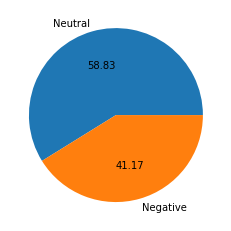

In [10]:
plt.pie(df["sentiment"].value_counts(),labels=["Neutral","Negative"],autopct="%0.2f")
plt.show()

# Text Preprocesssing

In [11]:
# Function to clean HTML Tags
import re
def clean_html(text):
    clean = re.compile("<.*?>")
    return re.sub(clean,"",text)

In [12]:
df["text"] = df["text"].apply(clean_html)

In [13]:
# Making the whole text small case
def small_case(text):
    return text.lower()

In [14]:
df["text"] = df["text"].apply(small_case)

In [15]:
df.head()

,text,sentiment
0,that`s enough! i`ll do nothing for 2 hours.,neutral
1,i have to go clothes shopping tomorrow i hate...,negative
2,i am bored. :| any idea`s of a nice site?,neutral
3,i don`t think will want to come back (guys r...,negative
4,_thomas if only the drinking game was tonight....,neutral


In [16]:
# Function to remove special characters
def remove_specialChar(text):
    x = ""
    for i in text:
        if i.isalnum():
            x = x+i
        else:
            x = x + " "
    return x

In [17]:
df["text"] = df["text"].apply(remove_specialChar)

In [18]:
# df.head()

In [19]:
spacyModel = spacy.load('en', disable = ['tagger','parser','ner'])

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
df["sentiment"] = encoder.fit_transform(df["sentiment"])

In [22]:
labels = df.sentiment

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [24]:
X_train.shape

(15118,)

In [25]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7, max_features=12000)

tfidf_train=tfidf_vectorizer.fit_transform(X_train)
tfidf_test=tfidf_vectorizer.transform(X_test)

In [26]:
tfidf_train.shape

(15118, 12000)

# Confusion Matrix

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Reference for the confusion matrix code: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Passive Aggressive Classifier

Accuracy: 68.68%
Confusion matrix, without normalization


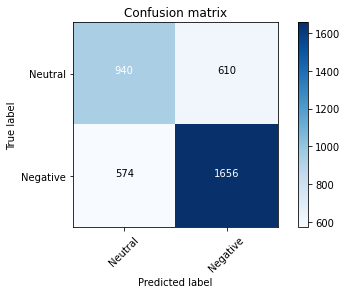

In [40]:
PAC = PassiveAggressiveClassifier(max_iter=100)
PAC.fit(tfidf_train,y_train)
y_pred=PAC.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,classes=["Neutral","Negative"])

In [37]:
scores = cross_val_score(PassiveAggressiveClassifier(), tfidf_train, y_train, cv=5)
scores.mean()

0.6863345742604757

# Random Forest

Accuracy: 75.08%
Confusion matrix, without normalization


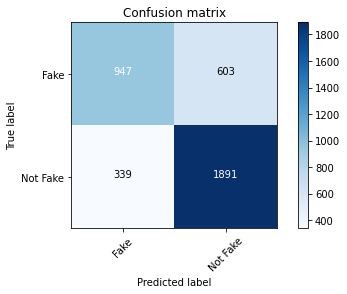

In [39]:
RF = RandomForestClassifier(n_estimators=150)
RF.fit(tfidf_train,y_train)
y_pred=RF.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,classes=["Neutral","Negative"])

In [30]:
scores = cross_val_score(RandomForestClassifier(), tfidf_train, y_train, cv=5)
scores.mean()

0.7447415055999244

# Support Vector Machine

Accuracy: 75.66%
Confusion matrix, without normalization


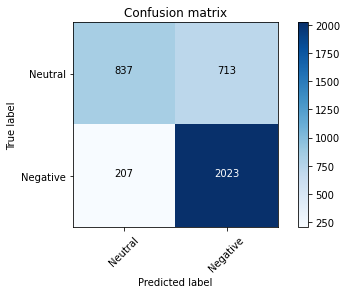

In [41]:
svmL = SVC(kernel="rbf")
svmL.fit(tfidf_train,y_train)
y_pred=svmL.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm,classes=["Neutral","Negative"])

In [32]:
scores = cross_val_score(SVC(), tfidf_train, y_train, cv=5)
scores.mean()

0.7464616730288249